In [1100]:
import pandas as pd

In [1101]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
building_info = pd.read_csv('./data/building_info.csv')

In [1102]:
train_df.head() # 10개의 columns

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [1103]:
test_df.head() # train data에서 강수량, 풍속, 전력소비량 이 제외됨. (7개의 columns)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


In [1104]:
train_df = train_df.rename(columns={ #train_df 열이름 변경
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
train_df.drop(['num_date_time', 'sunshine', 'solar_radiation'], axis = 1, inplace =True)  # num_date_time(= building_number + date_time)이므로, 제거

In [1105]:
test_df = test_df.rename(columns={ #test_df 열이름 변경
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity'
})
test_df.drop('num_date_time', axis = 1, inplace =True) # num_date_time(= building_number + date_time)이므로, 제거

In [1106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   building_number    204000 non-null  int64  
 1   date_time          204000 non-null  object 
 2   temperature        204000 non-null  float64
 3   rainfall           43931 non-null   float64
 4   windspeed          203981 non-null  float64
 5   humidity           203991 non-null  float64
 6   power_consumption  204000 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.9+ MB


In [1107]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   building_number  16800 non-null  int64  
 1   date_time        16800 non-null  object 
 2   temperature      16800 non-null  float64
 3   rainfall         16800 non-null  float64
 4   windspeed        16800 non-null  float64
 5   humidity         16800 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 787.6+ KB


In [1108]:
train_df.isna().sum(),  test_df.isna().sum() # train_df의 'rainfall(강수량)' 변수 결측치 개수는 160069개

(building_number           0
 date_time                 0
 temperature               0
 rainfall             160069
 windspeed                19
 humidity                  9
 power_consumption         0
 dtype: int64,
 building_number    0
 date_time          0
 temperature        0
 rainfall           0
 windspeed          0
 humidity           0
 dtype: int64)

In [1109]:
building_info = building_info.rename(columns={
    '건물번호': 'building_number',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_capacity',
    'ESS저장용량(kWh)': 'ess_capacity',
    'PCS용량(kW)': 'pcs_capacity'
})

In [1110]:
print(building_info['building_type'].unique()) 
print(len(building_info['building_type'].unique())) # building_type은 12종류임. 

['건물기타' '공공' '대학교' '데이터센터' '백화점및아울렛' '병원' '상용' '아파트' '연구소' '지식산업센터' '할인마트'
 '호텔및리조트']
12


In [1111]:
translation_dict = { # builiding_info의 building_type 열의 값 (한글 -> 영어) 변경
    '건물기타': 'Other Buildings',
    '공공': 'public',
    '대학교': 'University',
    '데이터센터': 'Data Center',
    '백화점및아울렛':'Department Store and Outlet',
    '병원': 'Hospital',
    '상용': 'Commercial',
    '아파트': 'Apartment',
    '연구소': 'Research Institute',
    '지식산업센터': 'Knoewledge Industry Center',
    '할인마트': 'Discount Mart',
    '호텔및리조트': 'Hotel and Resort'
} 
building_info['building_type'] = building_info['building_type'].replace(translation_dict) 

In [1112]:
building_info.head(5)

,building_number,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,Other Buildings,110634.00,39570.00,-,-,-
1,2,Other Buildings,122233.47,99000.00,-,-,-
2,3,Other Buildings,171243.00,113950.00,40,-,-
3,4,Other Buildings,74312.98,34419.62,60,-,-
4,5,Other Buildings,205884.00,150000.00,-,2557,1000


# 파일 병합

In [1113]:
# train_df, test_df와 building_info 를 'building_number'를 기준으로 병합함.
train_df = pd.merge(train_df, building_info, on ='building_number', how = 'left')
test_df = pd.merge(test_df, building_info, on ='building_number', how = 'left')

# 결측치 확인

In [1114]:
train_df.isna().sum() # rainfall, sunshine, solar_radiation 결측치 존재함.

building_number              0
date_time                    0
temperature                  0
rainfall                160069
windspeed                   19
humidity                     9
power_consumption            0
building_type                0
total_area                   0
cooling_area                 0
solar_power_capacity         0
ess_capacity                 0
pcs_capacity                 0
dtype: int64

In [1115]:
test_df.isna().sum() # test 데이터는 결측치 없음.

building_number         0
date_time               0
temperature             0
rainfall                0
windspeed               0
humidity                0
building_type           0
total_area              0
cooling_area            0
solar_power_capacity    0
ess_capacity            0
pcs_capacity            0
dtype: int64

In [1116]:
print(len(train_df[train_df['total_area'] == '-'])) # 연면적
print(len(train_df[train_df['cooling_area'] == '-'])) # 냉방면적
print(len(train_df[train_df['solar_power_capacity'] == '-'])) # 태양광 용량
print(len(train_df[train_df['ess_capacity'] == '-'])) # ESS 저장용량
print(len(train_df[train_df['pcs_capacity'] == '-'])) # PCS 용량

0
0
130560
193800
193800


In [1117]:
print(len(test_df[test_df['total_area'] == '-'])) # 연면적
print(len(test_df[test_df['cooling_area'] == '-'])) # 냉방면적
print(len(test_df[test_df['solar_power_capacity'] == '-'])) # 태양광 용량
print(len(test_df[test_df['ess_capacity'] == '-'])) # ESS 저장용량
print(len(test_df[test_df['pcs_capacity'] == '-'])) # PCS 용량


0
0
10752
15960
15960


In [1118]:
# 태양광 용량, ESS 저장용량, PCS 저장용량이 '-'라는 것은 해당 건물에 태양광/ESS/PCS가 설치되어 있지 않다는 의미로 해석하여,
# '-' 대신 0을 대입함.
train_df.loc[train_df['solar_power_capacity'] == '-', 'solar_power_capacity'] = 0
train_df.loc[train_df['ess_capacity'] == '-', 'ess_capacity'] = 0
train_df.loc[train_df['pcs_capacity'] == '-', 'pcs_capacity'] = 0

test_df.loc[test_df['solar_power_capacity'] == '-', 'solar_power_capacity'] = 0
test_df.loc[test_df['ess_capacity'] == '-', 'ess_capacity'] = 0
test_df.loc[test_df['pcs_capacity'] == '-', 'pcs_capacity'] = 0


In [1119]:
# total_area, cooling_area, solar_power_capacity, ess_capacity, pcs_capacity 를 수치형으로 변환.
train_df['total_area'] = pd.to_numeric(train_df['total_area'])
train_df['cooling_area'] = pd.to_numeric(train_df['cooling_area'])
train_df['solar_power_capacity'] = pd.to_numeric(train_df['solar_power_capacity'])
train_df['ess_capacity'] = pd.to_numeric(train_df['ess_capacity'])
train_df['pcs_capacity'] = pd.to_numeric(train_df['pcs_capacity'])

test_df['total_area'] = pd.to_numeric(test_df['total_area'])
test_df['cooling_area'] = pd.to_numeric(test_df['cooling_area'])
test_df['solar_power_capacity'] = pd.to_numeric(test_df['solar_power_capacity'])
test_df['ess_capacity'] = pd.to_numeric(test_df['ess_capacity'])
test_df['pcs_capacity'] = pd.to_numeric(test_df['pcs_capacity'])

In [1120]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   building_number       204000 non-null  int64  
 1   date_time             204000 non-null  object 
 2   temperature           204000 non-null  float64
 3   rainfall              43931 non-null   float64
 4   windspeed             203981 non-null  float64
 5   humidity              203991 non-null  float64
 6   power_consumption     204000 non-null  float64
 7   building_type         204000 non-null  object 
 8   total_area            204000 non-null  float64
 9   cooling_area          204000 non-null  float64
 10  solar_power_capacity  204000 non-null  float64
 11  ess_capacity          204000 non-null  float64
 12  pcs_capacity          204000 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 21.8+ MB


In [1121]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16800 entries, 0 to 16799
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   building_number       16800 non-null  int64  
 1   date_time             16800 non-null  object 
 2   temperature           16800 non-null  float64
 3   rainfall              16800 non-null  float64
 4   windspeed             16800 non-null  float64
 5   humidity              16800 non-null  int64  
 6   building_type         16800 non-null  object 
 7   total_area            16800 non-null  float64
 8   cooling_area          16800 non-null  float64
 9   solar_power_capacity  16800 non-null  float64
 10  ess_capacity          16800 non-null  float64
 11  pcs_capacity          16800 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 1.7+ MB


In [1122]:
# solar_power_capacity, ess_capacity, pcs_capacity가 결측치가 많아, 열에서 제거함.
#train_df = train_df.drop(['solar_power_capacity', 'ess_capacity', 'pcs_capacity'], axis = 1)
#test_df = test_df.drop(['solar_power_capacity', 'ess_capacity', 'pcs_capacity'], axis = 1)

In [1123]:
# datetime을 년도, 월, 주, 시간으로 쪼갠다.
train_df['date_time'] = pd.to_datetime(train_df['date_time'], format = '%Y%m%d %H')
test_df['date_time'] = pd.to_datetime(test_df['date_time'], format = '%Y%m%d %H')


# date time feature 생성
train_df['hour'] = train_df['date_time'].dt.hour
train_df['day'] = train_df['date_time'].dt.day
train_df['month'] = train_df['date_time'].dt.month
train_df['year'] = train_df['date_time'].dt.year

test_df['hour'] = test_df['date_time'].dt.hour
test_df['day'] = test_df['date_time'].dt.day
test_df['month'] = test_df['date_time'].dt.month
test_df['year'] = test_df['date_time'].dt.year


In [1124]:
print(len(train_df['building_type'].unique()))
print(len(test_df['building_type'].unique()))


12
12


In [1125]:
#one hot encoding 생성 -> building_type 열의 더미 변수 생성
#train_df = pd.get_dummies(train_df, columns = ['building_type'], drop_first = True)


# 데이터 시각화

In [1126]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

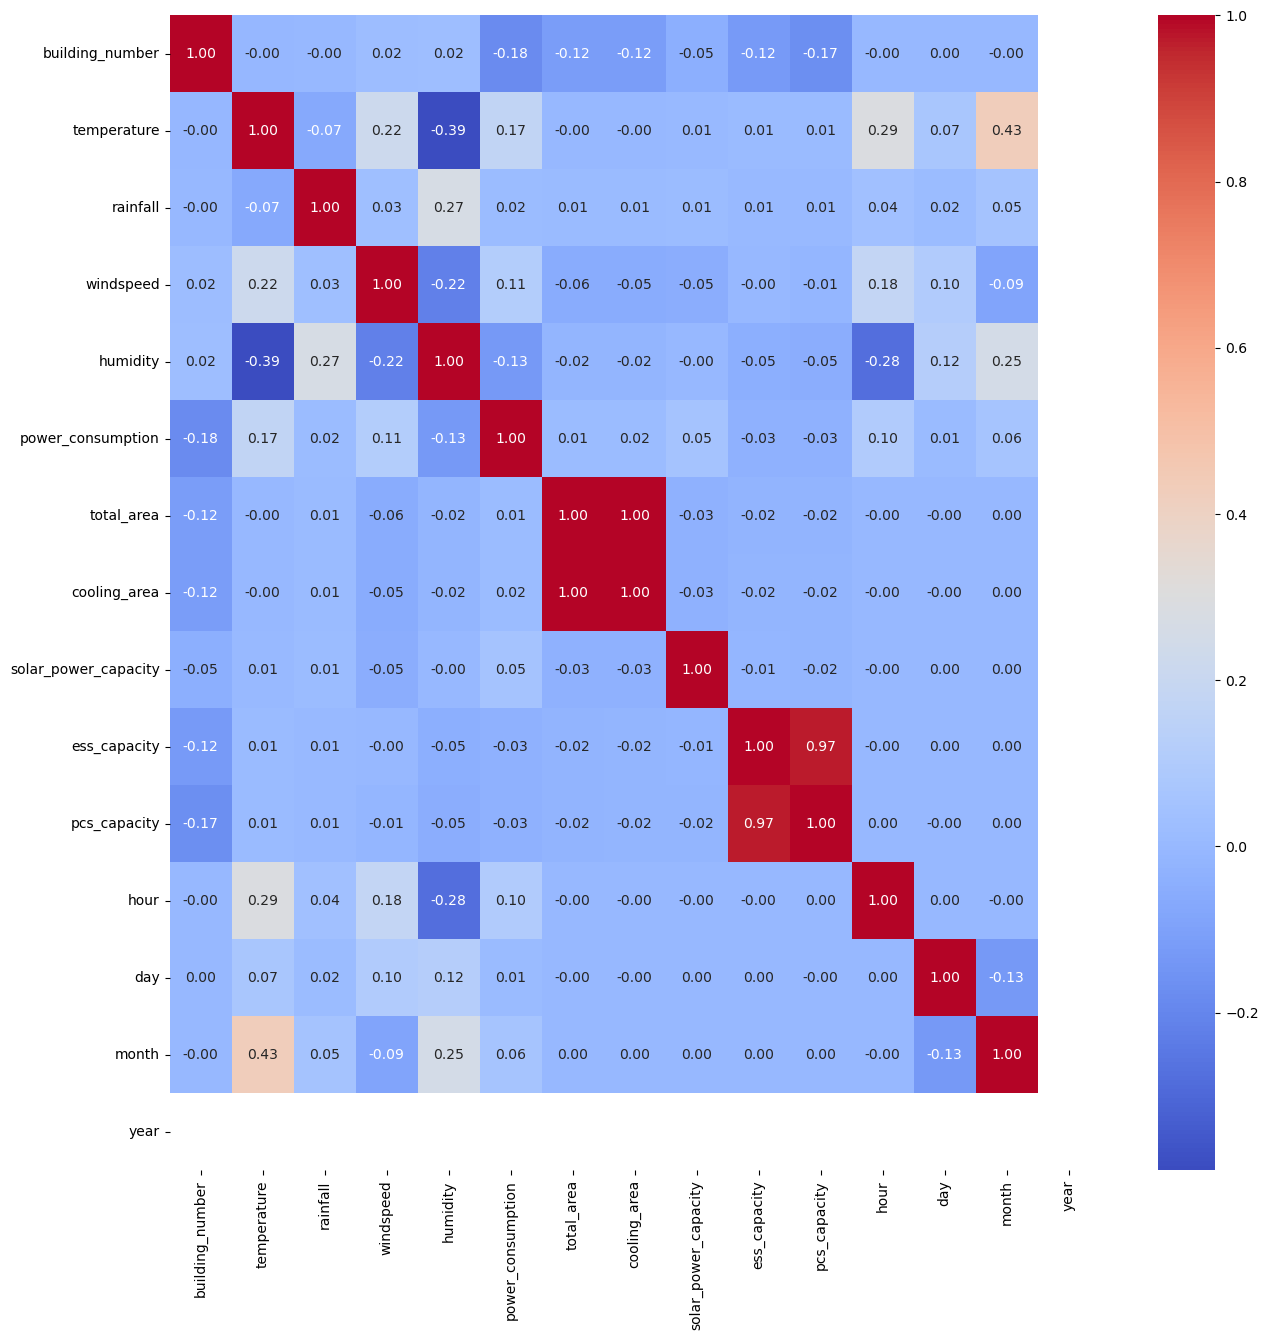

In [1127]:
# 상관분석(히트맵)
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(), annot = True, cmap='coolwarm', fmt='.2f')

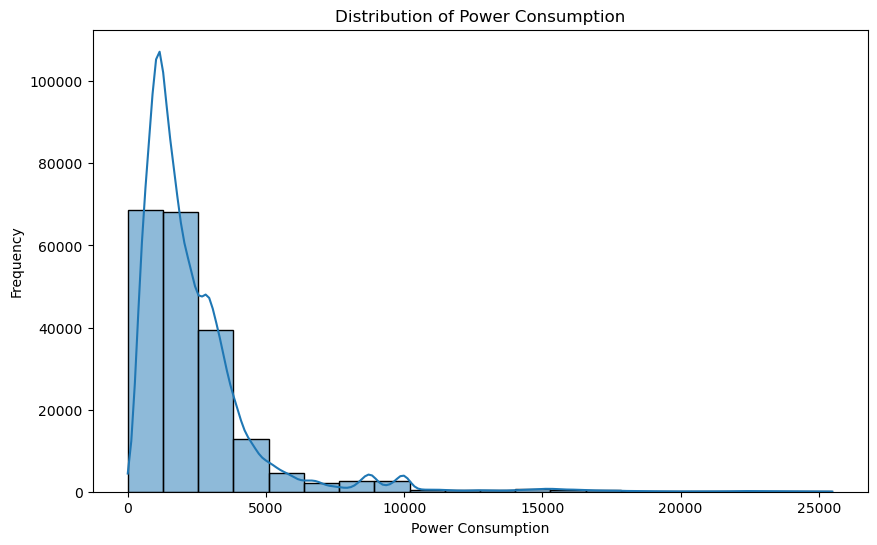

In [1128]:
# histogram 생성
plt.figure(figsize=(10,6))
sns.histplot(train_df['power_consumption'], bins = 20, kde =True)
plt.title('Distribution of Power Consumption')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.show()

In [1148]:
# 년 기준 일 평균 소비전력(일년 중 몇번째 날의 평균소비전력)
train_df['day_of_year']=train_df['date_time'].dt.dayofyear
test_df['day_of_year'] = test_df['date_time'].dt.dayofyear

mean_power_by_day_of_year = train_df.groupby('day_of_year')['power_consumption'].mean()

# 년 기준 시간 평균 소비전력
train_df['hour_of_year'] = train_df['date_time'].dt.hour + (train_df['date_time'].dt.dayofyear - 1) *24
test_df['hour_of_year'] = test_df['date_time'].dt.hour + (test_df['date_time'].dt.dayofyear - 1) *24

mean_power_by_hour_of_year = train_df.groupby('hour_of_year')['power_consumption'].mean()

# 년 기준 월 평균 소비전력
mean_power_by_month = train_df.groupby('month')['power_consumption'].mean()

# 일 기준 시간 평균 소비전력
mean_power_by_hour = train_df.groupby('hour')['power_consumption'].mean()

# 월 기준 시간 평균 소비전력
mean_power_by_day = train_df.groupby('day')['power_consumption'].mean()

##### 1. 주기적으로 전력소모량이 떨어지는 날은 주말임. 즉 주말에 일을 하지 않아 떨어지는 모습을 예상할 수 있음.

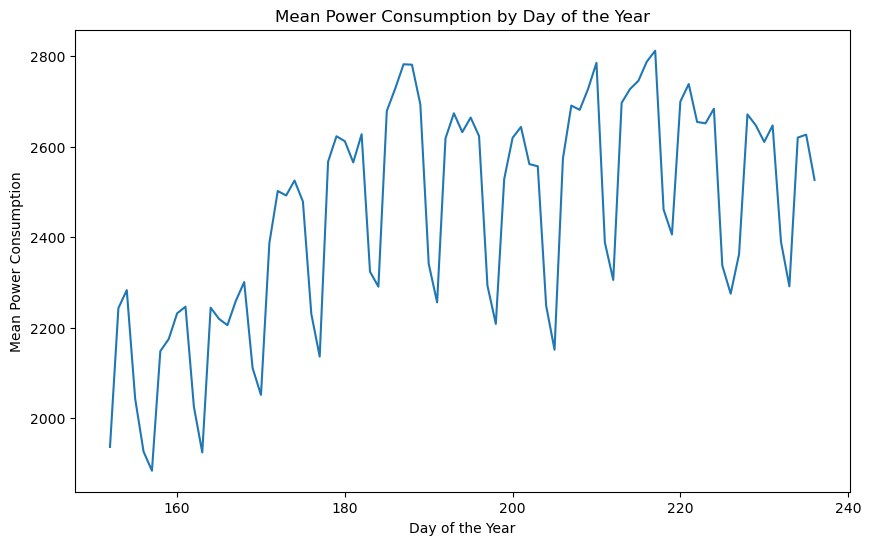

In [1149]:
# 년 기준 일 평균 소비 전력
plt.figure(figsize = (10, 6))
sns.lineplot(x = mean_power_by_day_of_year.index, y=mean_power_by_day_of_year.values)
plt.title('Mean Power Consumption by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Mean Power Consumption')
plt.show()


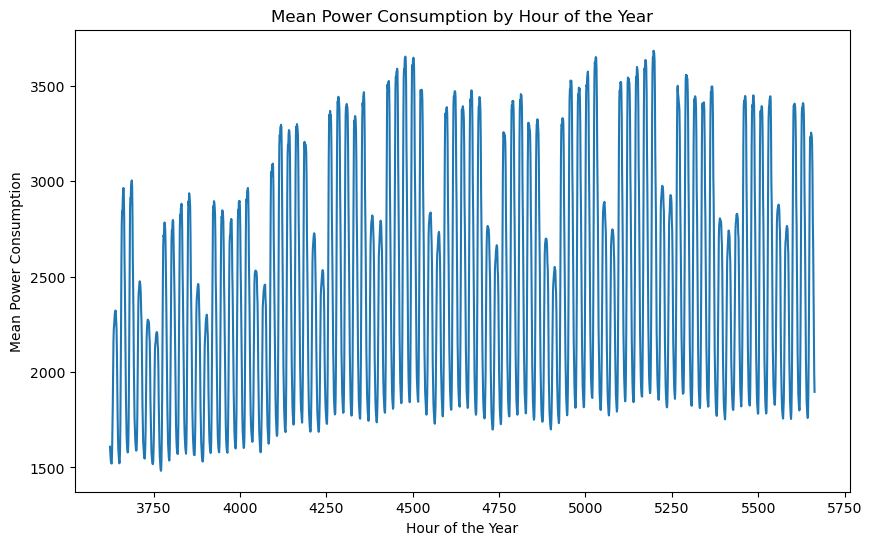

In [1150]:
plt.figure(figsize = (10,6))
sns.lineplot(x=mean_power_by_hour_of_year.index, y=mean_power_by_hour_of_year.values)
plt.title('Mean Power Consumption by Hour of the Year')
plt.xlabel('Hour of the Year')
plt.ylabel('Mean Power Consumption')
plt.show()

##### 1. 낮 시간대에는 전력소모량이 증가하는 반면, 밤 시간대에는 전력 사용량이 감소함.
##### 2. 8월에 가까워질수록 전력사용량이 증가함. 이는 8월에 가까워질 수록 날이 더워져 에어컨 사용량의 증가로 예상할 수 있음.

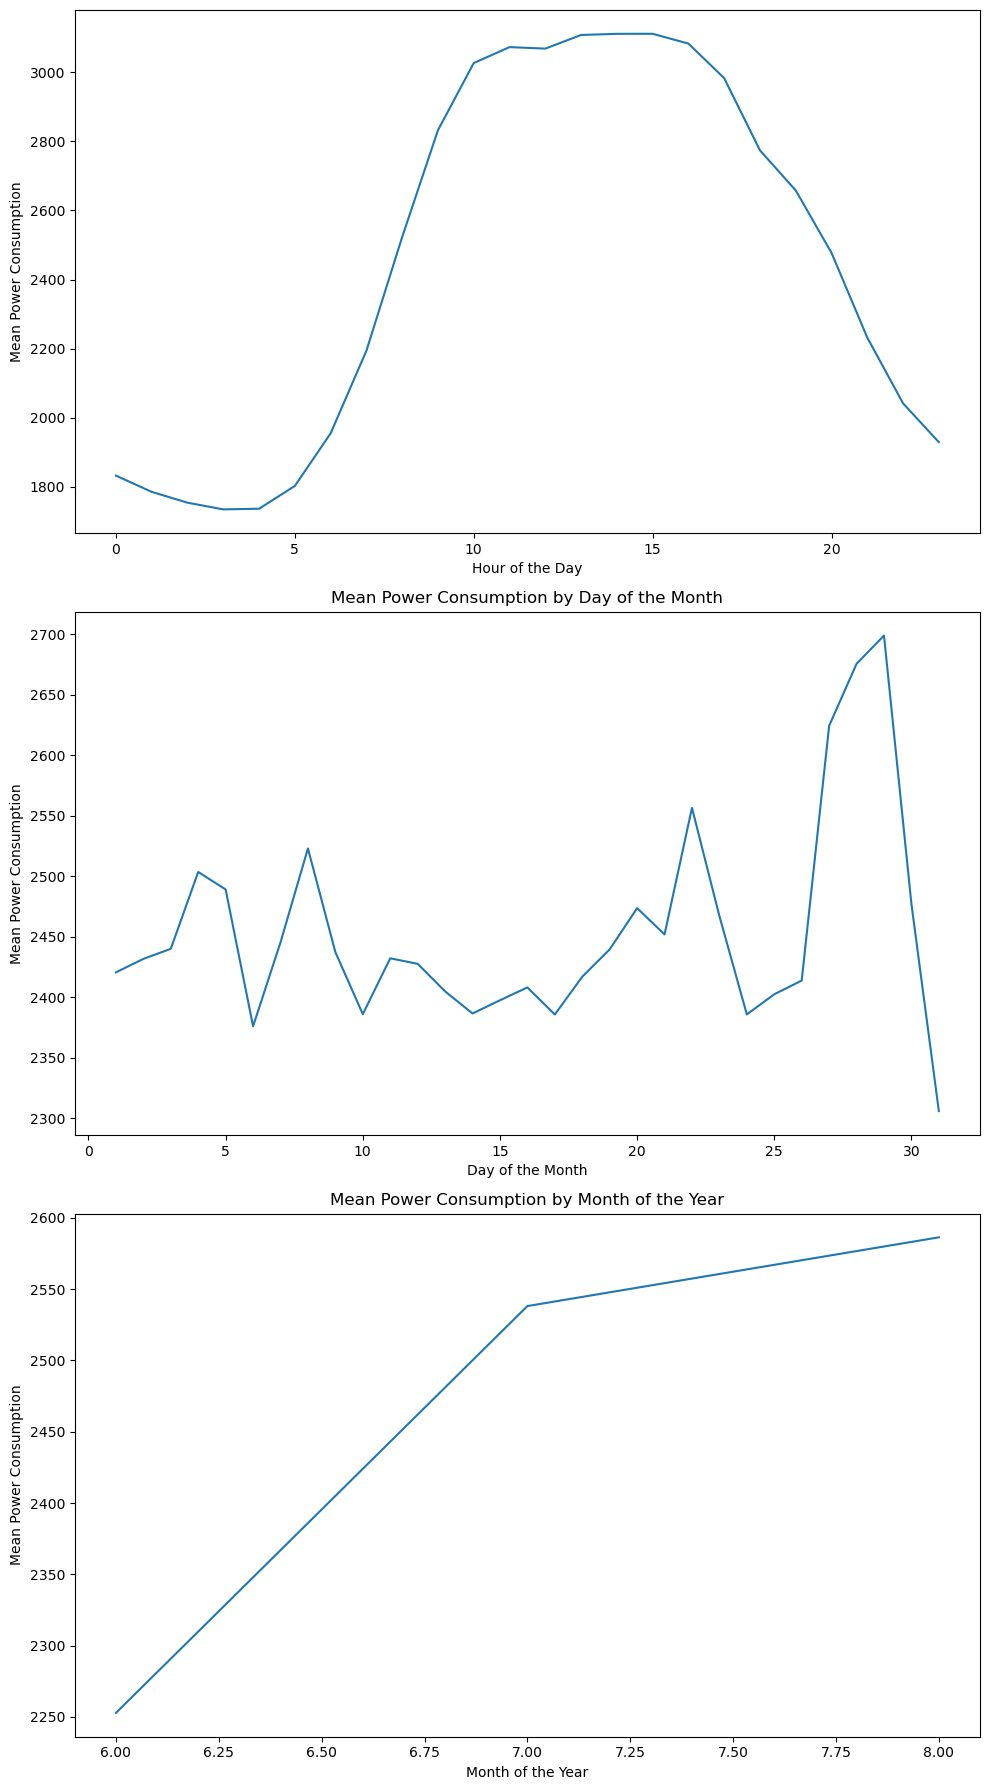

In [1151]:
# 소비 전력 평균 분포 시각화
fig, axs = plt.subplots(3, 1, figsize = (10, 18))

# Plot mean power consumption by hour of the day
sns.lineplot(x=mean_power_by_hour.index, y=mean_power_by_hour.values, ax = axs[0])
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Mean Power Consumption')

# Plot mean power consumption by day of the month
sns.lineplot(x=mean_power_by_day.index, y = mean_power_by_day.values, ax = axs[1])
axs[1].set_title('Mean Power Consumption by Day of the Month')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylabel('Mean Power Consumption')

# 년기준 월평균 소비전력
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values, ax=axs[2])
axs[2].set_title('Mean Power Consumption by Month of the Year')
axs[2].set_xlabel('Month of the Year')
axs[2].set_ylabel('Mean Power Consumption')

plt.tight_layout()
plt.show()


#### 1. 주말(토, 일)이 다른 요일에 비해 평균 전력량이 적음.

Text(0, 0.5, 'Mean Power Consumption')

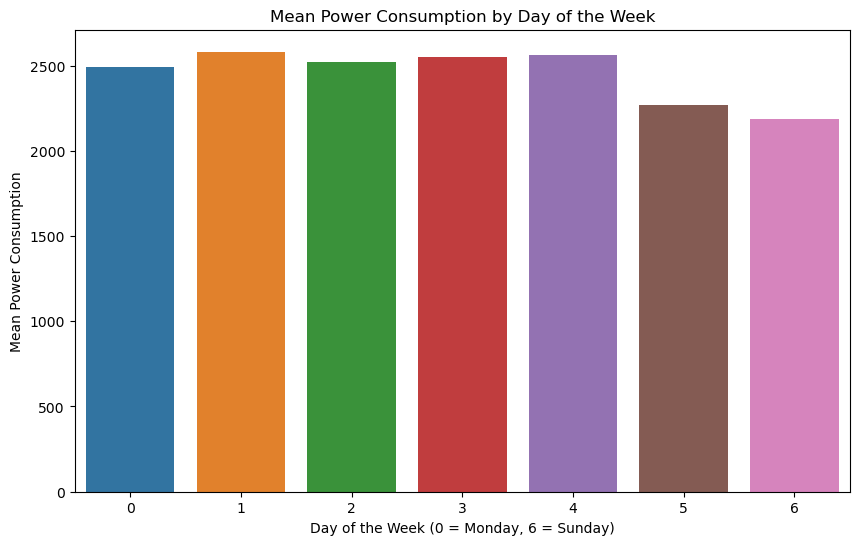

In [1152]:
# 요일 추출(월요일: 0 ~ 일요일: 6)
train_df['day_of_week'] = train_df['date_time'].dt.dayofweek 
test_df['day_of_week'] = test_df['date_time'].dt.dayofweek

# 요일별 전력평균
mean_power_by_day_of_week = train_df.groupby('day_of_week')['power_consumption'].mean()

plt.figure(figsize = (10, 6))
sns.barplot(x=mean_power_by_day_of_week.index, y=mean_power_by_day_of_week.values)
plt.title('Mean Power Consumption by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Mean Power Consumption')


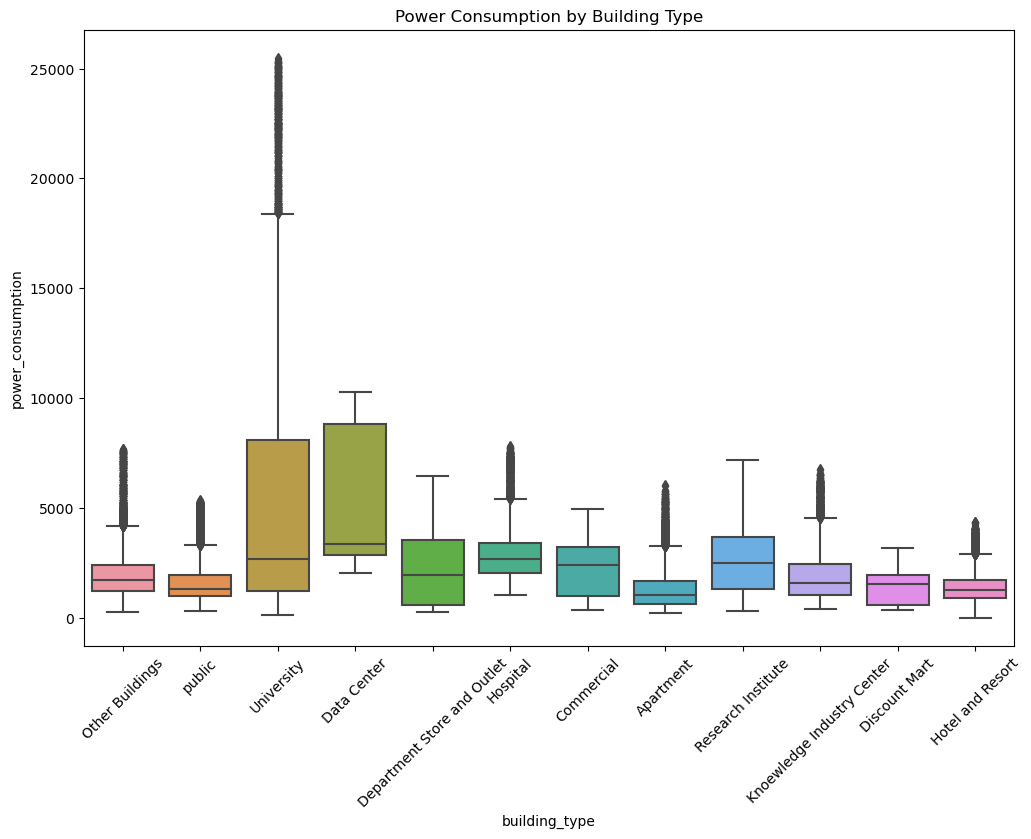

In [1153]:
# building_type 별 데이터 소비 전력 평균 분포 시각화
plt.figure(figsize = (12, 8))
sns.boxplot(x='building_type', y='power_consumption', data=train_df)
plt.title('Power Consumption by Building Type')
plt.xticks(rotation = 45)
plt.show()

In [1135]:
mean_power_by_hour_building = train_df.groupby(['hour', 'building_type'])['power_consumption'].mean().reset_index()
pivot_df = mean_power_by_hour_building.pivot(index = 'hour', columns = 'building_type', values = 'power_consumption')

pivot_df


building_type,Apartment,Commercial,Data Center,Department Store and Outlet,Discount Mart,Hospital,Hotel and Resort,Knoewledge Industry Center,Other Buildings,Research Institute,University,public
hour,,,,,,,,,,,,
0,1196.614081,1617.616676,5379.838235,709.004250,688.120235,2329.545265,1016.423515,1150.034912,1616.129012,2357.696404,4446.584221,1007.092301
1,1005.660772,1587.047912,5366.433600,670.924412,655.819279,2302.066765,961.586426,1108.601118,1603.843635,2339.366838,4334.611882,996.259301
2,897.030221,1567.971441,5350.160541,642.876353,648.456397,2305.248000,935.935235,1072.343029,1575.108376,2318.956390,4252.626838,993.549625
3,837.648618,1569.872118,5340.291671,625.432544,640.333191,2298.618882,922.467926,1054.634559,1553.335094,2311.910537,4193.566926,985.252091
4,816.264838,1625.475618,5328.233859,610.747456,650.541662,2301.923206,949.093632,1053.255529,1543.278965,2328.654037,4141.570235,1012.962507
5,839.582007,1821.436059,5316.350753,612.176603,664.282897,2386.137353,1036.939544,1077.679324,1527.510388,2440.926934,4137.474676,1332.848306
6,992.258779,2089.720676,5322.089365,727.871956,749.806721,2684.062588,1210.669147,1208.205441,1518.966188,2631.718404,4251.083853,1718.770779
7,1204.981390,2367.111882,5333.653694,1161.797691,968.402647,3007.148382,1375.980706,1513.212618,1590.148282,2877.906485,4656.923662,1974.335574
8,1274.537140,2569.795324,5360.003859,1762.990191,1290.299338,3349.019735,1545.649015,2080.205824,1880.519965,3076.432904,5578.192765,2134.552250


##### 1. Data Center의 경우 시간에 따른 전력사용량 평균이 일정함.
##### 2. University, Data Center에서 많은 양의 전력을 소모함.
##### 3. 대부분 낮시간에 전력사용량이 증가하지만, Data Center, Apartment는 전력사용량이 모든 시간에서 일정함.


<AxesSubplot:xlabel='hour'>

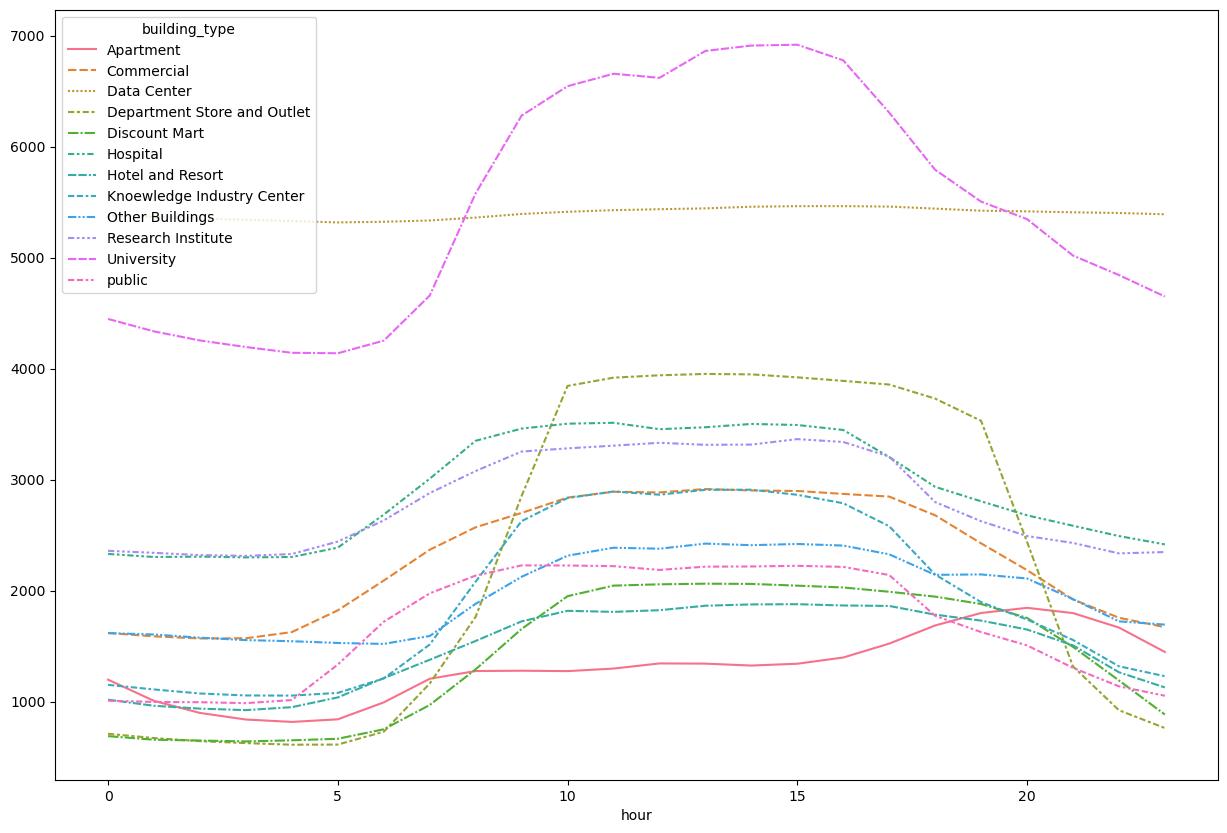

In [1154]:
plt.figure(figsize = (15,10))
sns.lineplot(data = pivot_df)


In [1155]:
mean_power_by_day_building = train_df.groupby(['day_of_week', 'building_type'])['power_consumption'].mean().reset_index()
pivot_df_day = mean_power_by_day_building.pivot(index = 'day_of_week', columns = 'building_type', values = 'power_consumption')
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df_day.index = day_names
pivot_df_day

building_type,Apartment,Commercial,Data Center,Department Store and Outlet,Discount Mart,Hospital,Hotel and Resort,Knoewledge Industry Center,Other Buildings,Research Institute,University,public
Monday,1327.352487,2328.533229,5418.608250,2052.356120,1448.169935,3005.432734,1461.789036,2108.953750,1863.692799,2952.336441,5748.519991,1792.022200
Tuesday,1303.366966,2507.712500,5412.050250,2265.937917,1443.820807,3080.213307,1458.492214,2226.169219,1952.958813,3111.230282,5929.496354,1889.867571
Wednesday,1261.542728,2436.228365,5377.178654,2243.524399,1421.410577,2998.808438,1434.834038,2114.778365,1953.699474,3014.382143,5727.888470,1799.507296
Thursday,1259.748099,2484.474193,5381.410250,2238.110820,1428.655937,3037.599323,1457.026211,2154.910130,1994.608483,3056.480100,5809.801094,1856.170768
Friday,1264.510898,2467.687656,5397.270875,2288.203047,1445.608255,3039.015260,1498.335938,2152.815000,2086.137139,2992.053507,5764.352674,1823.308900
Saturday,1352.528021,1958.150625,5400.437583,2370.738568,1482.259544,2650.928828,1539.059206,1447.418958,2049.158740,2279.192092,4712.096840,1317.935009
Sunday,1397.910013,1901.434896,5392.971167,2389.927357,1240.809479,2570.364479,1514.717240,1328.815365,1903.324340,2238.516745,4495.858906,1299.410047


##### 1. Data Center의 경우 요일에 따른 전력사용량이 거의 일정함.
##### 2. University, Data Center에서 많은 양의 전력을 사용함.
##### 3. 주말에는 전력 소비가 대체로 낮아지지만, Apartment, Department Store and Outlet은 조금 증가하는 현상이 나타남.

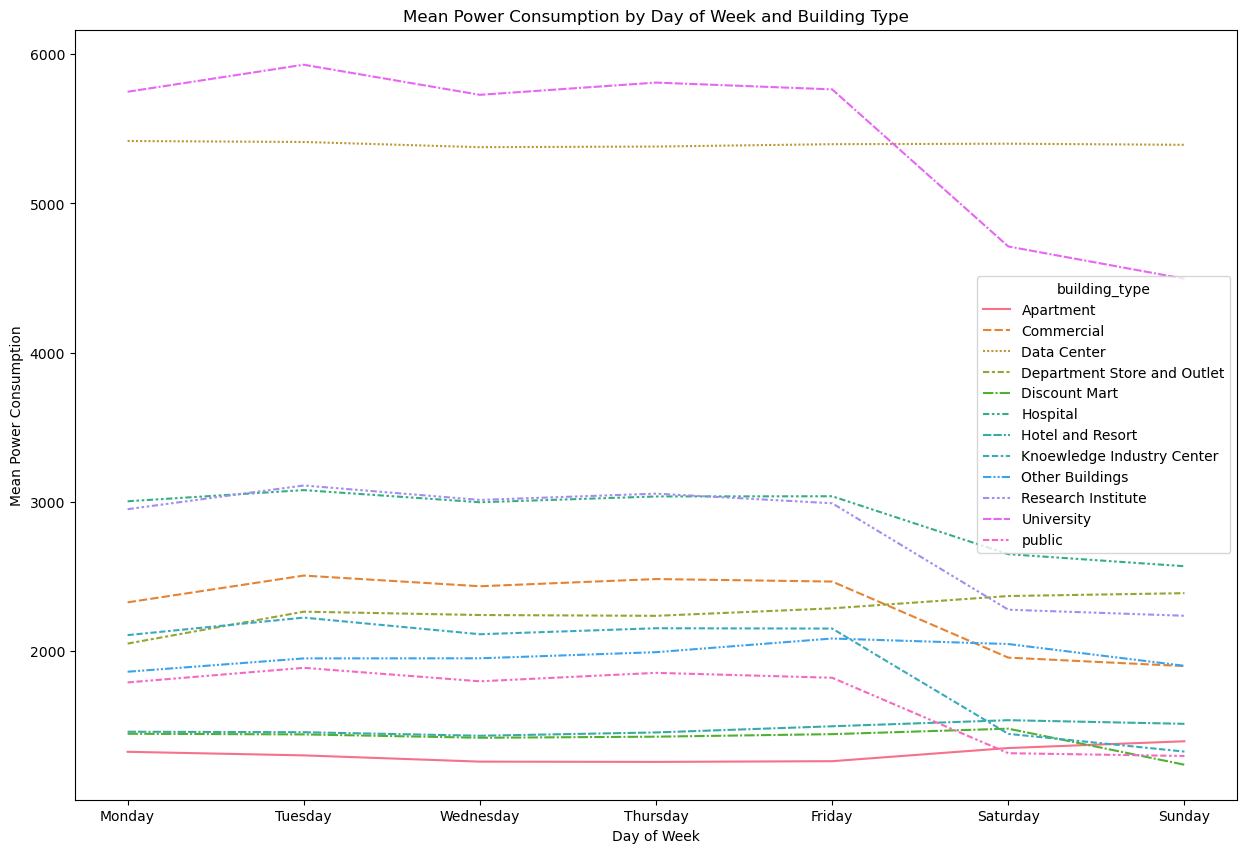

In [1138]:
plt.figure(figsize=(15,10))
sns.lineplot(data = pivot_df_day)
plt.title('Mean Power Consumption by Day of Week and Building Type')
plt.xlabel('Day of Week')
plt.ylabel('Mean Power Consumption')
plt.show()


# Modeling

In [1156]:
# 결측치는 0으로 우선 처리함.
train_df = train_df.fillna(0)
print(train_df.isna().sum())

test_df = test_df.fillna(0)
print(test_df.isna().sum())

building_number         0
date_time               0
temperature             0
rainfall                0
windspeed               0
humidity                0
power_consumption       0
building_type           0
total_area              0
cooling_area            0
solar_power_capacity    0
ess_capacity            0
pcs_capacity            0
hour                    0
day                     0
month                   0
year                    0
day_of_year             0
hour_of_year            0
day_of_week             0
dtype: int64
building_number         0
date_time               0
temperature             0
rainfall                0
windspeed               0
humidity                0
building_type           0
total_area              0
cooling_area            0
solar_power_capacity    0
ess_capacity            0
pcs_capacity            0
hour                    0
day                     0
month                   0
year                    0
day_of_year             0
hour_of_year            0

In [1160]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [1163]:
X = train_df.drop(columns = ['power_consumption', 'building_type', 'date_time', 'ess_capacity', 'solar_power_capacity', 'pcs_capacity', 'windspeed', 'rainfall'])
y = train_df['power_consumption']
y = np.array(y).reshape(-1,1)

test = test_df.drop(columns = ['building_type', 'date_time', 'ess_capacity', 'solar_power_capacity', 'pcs_capacity', 'windspeed', 'rainfall'])

In [1164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16800 entries, 0 to 16799
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   building_number  16800 non-null  int64  
 1   temperature      16800 non-null  float64
 2   humidity         16800 non-null  int64  
 3   total_area       16800 non-null  float64
 4   cooling_area     16800 non-null  float64
 5   hour             16800 non-null  int64  
 6   day              16800 non-null  int64  
 7   month            16800 non-null  int64  
 8   year             16800 non-null  int64  
 9   day_of_year      16800 non-null  int64  
 10  hour_of_year     16800 non-null  int64  
 11  day_of_week      16800 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.7 MB


In [1165]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   building_number  204000 non-null  int64  
 1   temperature      204000 non-null  float64
 2   humidity         204000 non-null  float64
 3   total_area       204000 non-null  float64
 4   cooling_area     204000 non-null  float64
 5   hour             204000 non-null  int64  
 6   day              204000 non-null  int64  
 7   month            204000 non-null  int64  
 8   year             204000 non-null  int64  
 9   day_of_year      204000 non-null  int64  
 10  hour_of_year     204000 non-null  int64  
 11  day_of_week      204000 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 20.2 MB


In [1166]:
X.shape, y.shape, test.shape

((204000, 12), (204000, 1), (16800, 12))

In [1167]:
model = RandomForestRegressor()

In [1168]:
from sklearn.model_selection import train_test_split

# 전체 데이터를 훈련 데이터와 테스트 데이터로 분리
# X는 특성 행렬, y는 타겟 벡터 (또는 타겟 변수)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [1169]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((142800, 12), (142800, 1), (61200, 12), (61200, 1))

In [1170]:
from sklearn.linear_model import LinearRegression

In [1196]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [1197]:
model.score(test_X, test_y)

0.07578395666364657

In [1198]:
model.predict(test)

array([[3039.53060893],
       [3017.57104607],
       [2973.52734942],
       ...,
       [1512.77694537],
       [1532.78866694],
       [1449.13576084]])

In [1199]:
submission['answer'] = model.predict(test)

In [1200]:
submission.to_csv('./data/result1.csv', index=False) # csv로 결과제출

In [1201]:
model1 = RandomForestRegressor() # 랜덤포레스트

In [1211]:
model1.fit(train_X, train_y)

C:\Users\tjxog\AppData\Local\Temp\ipykernel_11332\752099780.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(train_X, train_y)


RandomForestRegressor()

In [1210]:
model1.score(test_X , test_y)

0.9969076120356176

In [1212]:
model1.predict(test)

array([2113.416 , 2099.3808, 1988.3664, ...,  803.4108,  816.1044,
        660.864 ])

In [1206]:
submission['answer'] = model1.predict(test)

In [1207]:
submission.to_csv('./data/result2.csv', index = False)